In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df1 = pd.read_csv('ethiopia_tripadvisor_data_model_3.csv')
df1.head()

,Destination Name,Destination Type,Review Head,Review Body,Review Text,RB_Sentence1,TextBlob Polarity Head,TextBlob Polarity Body,TextBlob Polarity Text,TextBlob Polarity RBS1,RB_Sentence1_Split
0,Rock-Hewn Churches of Lalibela,Landmarks,Incredible locations don't be put off thinking...,Amazing location must visit. This site is mark...,Incredible locations don't be put off thinking...,Amazing location must visit.,-0.05,0.300000,0.125000,0.6000,"['Amazing', 'location', 'must', 'visit.']"
1,Rock-Hewn Churches of Lalibela,Landmarks,It is a real miracle of the world!,I do recommend to visit Lalibela churches and ...,It is a real miracle of the world! I do recomm...,I do recommend to visit Lalibela churches and ...,0.25,-0.150000,-0.016667,0.0000,"['I', 'do', 'recommend', 'to', 'visit', 'Lalib..."
2,Rock-Hewn Churches of Lalibela,Landmarks,Incredible experience,A must visit in Ethiopia - one of the most uni...,Incredible experience A must visit in Ethiopia...,A must visit in Ethiopia - one of the most uni...,0.90,0.345000,0.483750,0.4375,"['A', 'must', 'visit', 'in', 'Ethiopia', '-', ..."
3,Rock-Hewn Churches of Lalibela,Landmarks,Amazing,These churches have to be seen to be believed....,Amazing These churches have to be seen to be b...,These churches have to be seen to be believed.,0.60,0.225000,0.350000,0.0000,"['These', 'churches', 'have', 'to', 'be', 'see..."
4,Rock-Hewn Churches of Lalibela,Landmarks,So much history,Thanks to our tour organiser Ephram who is bas...,So much history Thanks to our tour organiser E...,Thanks to our tour organiser Ephram who is bas...,0.20,0.233333,0.228571,0.2000,"['Thanks', 'to', 'our', 'tour', 'organiser', '..."


In [3]:
df1['RH_Split'] = df1['Review Head'].apply(lambda x: x.split(' '))
df1['RB_Split'] = df1['Review Body'].apply(lambda x: x.split(' '))
df1['RT_Split'] = df1['Review Text'].apply(lambda x: x.split(' '))
df1['RB_Sentence1_Split'] = df1['RB_Sentence1'].apply(lambda x: x.split(' '))
df1.head()

,Destination Name,Destination Type,Review Head,Review Body,Review Text,RB_Sentence1,TextBlob Polarity Head,TextBlob Polarity Body,TextBlob Polarity Text,TextBlob Polarity RBS1,RB_Sentence1_Split,RH_Split,RB_Split,RT_Split
0,Rock-Hewn Churches of Lalibela,Landmarks,Incredible locations don't be put off thinking...,Amazing location must visit. This site is mark...,Incredible locations don't be put off thinking...,Amazing location must visit.,-0.05,0.300000,0.125000,0.6000,"[Amazing, location, must, visit.]","[Incredible, locations, don't, be, put, off, t...","[Amazing, location, must, visit., This, site, ...","[Incredible, locations, don't, be, put, off, t..."
1,Rock-Hewn Churches of Lalibela,Landmarks,It is a real miracle of the world!,I do recommend to visit Lalibela churches and ...,It is a real miracle of the world! I do recomm...,I do recommend to visit Lalibela churches and ...,0.25,-0.150000,-0.016667,0.0000,"[I, do, recommend, to, visit, Lalibela, church...","[It, is, a, real, miracle, of, the, world!]","[I, do, recommend, to, visit, Lalibela, church...","[It, is, a, real, miracle, of, the, world!, I,..."
2,Rock-Hewn Churches of Lalibela,Landmarks,Incredible experience,A must visit in Ethiopia - one of the most uni...,Incredible experience A must visit in Ethiopia...,A must visit in Ethiopia - one of the most uni...,0.90,0.345000,0.483750,0.4375,"[A, must, visit, in, Ethiopia, -, one, of, the...","[Incredible, experience, ]","[A, must, visit, in, Ethiopia, -, one, of, the...","[Incredible, experience, A, must, visit, in, E..."
3,Rock-Hewn Churches of Lalibela,Landmarks,Amazing,These churches have to be seen to be believed....,Amazing These churches have to be seen to be b...,These churches have to be seen to be believed.,0.60,0.225000,0.350000,0.0000,"[These, churches, have, to, be, seen, to, be, ...",[Amazing],"[These, churches, have, to, be, seen, to, be, ...","[Amazing, These, churches, have, to, be, seen,..."
4,Rock-Hewn Churches of Lalibela,Landmarks,So much history,Thanks to our tour organiser Ephram who is bas...,So much history Thanks to our tour organiser E...,Thanks to our tour organiser Ephram who is bas...,0.20,0.233333,0.228571,0.2000,"[Thanks, to, our, tour, organiser, Ephram, who...","[So, much, history]","[Thanks, to, our, tour, organiser, Ephram, who...","[So, much, history, Thanks, to, our, tour, org..."


In [4]:
df1[df1['Destination Type'] == 'Museums'][df1['TextBlob Polarity Head'] > 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 2804 to 8300
Data columns (total 14 columns):
Destination Name          1306 non-null object
Destination Type          1306 non-null object
Review Head               1306 non-null object
Review Body               1306 non-null object
Review Text               1306 non-null object
RB_Sentence1              1306 non-null object
TextBlob Polarity Head    1306 non-null float64
TextBlob Polarity Body    1306 non-null float64
TextBlob Polarity Text    1306 non-null float64
TextBlob Polarity RBS1    1306 non-null float64
RB_Sentence1_Split        1306 non-null object
RH_Split                  1306 non-null object
RB_Split                  1306 non-null object
RT_Split                  1306 non-null object
dtypes: float64(4), object(10)
memory usage: 153.0+ KB


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


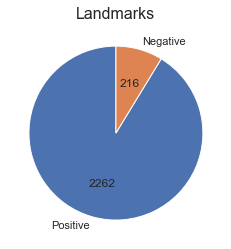

In [5]:
x = [2262, 216]
total = sum(x)
labels = ['Positive', 'Negative']
plt.rcParams['font.size'] = 12
plt.pie(x = x, labels = labels, startangle = 90, autopct = lambda x: '{:.0f}'.format(x * total / 100))
plt.title('Landmarks', fontsize = 16)
plt.show()

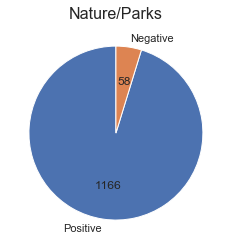

In [6]:
x = [1166, 58]
total = sum(x)
labels = ['Positive', 'Negative']
plt.rcParams['font.size'] = 12
plt.pie(x = x, labels = labels, startangle = 90, autopct = lambda x: '{:.0f}'.format(x * total / 100))
plt.title('Nature/Parks', fontsize = 16)
plt.show()

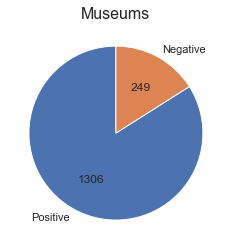

In [7]:
x = [1306, 249]
total = sum(x)
labels = ['Positive', 'Negative']
plt.rcParams['font.size'] = 12
plt.pie(x = x, labels = labels, startangle = 90, autopct = lambda x: '{:.0f}'.format(x * total / 100))
plt.title('Museums', fontsize = 16)
plt.show()

In [ ]:
# types = {'Ethiopia Landmarks': [7.56, 24.54], 'Kenya Landmarks': [24.8, 40], 
#          'Ethiopia Nature/Parks': [31.39, 51.72], 'Kenya Nature/Parks': [27.34, 13.16],
#          'Ethiopia Museums': [19.22, 33.33], 'Kenya Museums': [24.2, 12.68]}

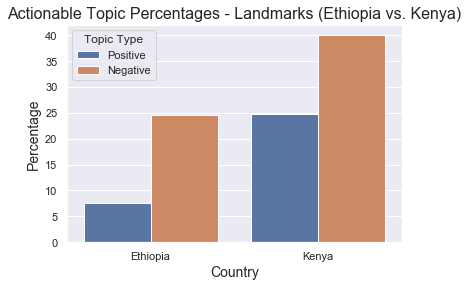

In [39]:
# Landmarks

df = pd.DataFrame()
df['Percentage'] = pd.Series([7.56, 24.54, 24.80, 40.00])
df['Actionable'] = pd.Series(['Positive','Negative','Positive','Negative'])
df['Country'] =pd.Series(['Ethiopia', 'Ethiopia', 'Kenya', 'Kenya'])
sns.barplot(x = 'Country', y = 'Percentage', data = df, hue = 'Actionable')
plt.title('Actionable Topic Percentages - Landmarks (Ethiopia vs. Kenya)', fontsize = 16)
plt.xlabel('Country', fontsize = 14)
plt.ylabel('Percentage', fontsize = 14)
plt.legend(title = 'Topic Type')
plt.show()

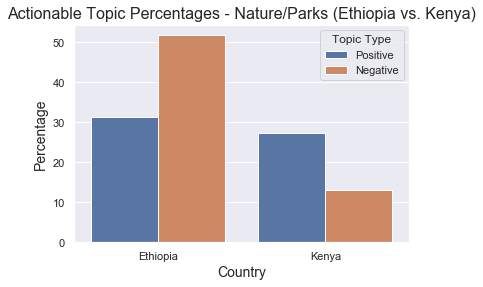

In [40]:
# Nature/Parks

df = pd.DataFrame()
df['Percentage'] = pd.Series([31.39, 51.72, 27.34, 13.16])
df['Actionable'] = pd.Series(['Positive','Negative','Positive','Negative'])
df['Country'] =pd.Series(['Ethiopia', 'Ethiopia', 'Kenya', 'Kenya'])
sns.barplot(x = 'Country', y = 'Percentage', data = df, hue = 'Actionable')
plt.title('Actionable Topic Percentages - Nature/Parks (Ethiopia vs. Kenya)', fontsize = 16)
plt.xlabel('Country', fontsize = 14)
plt.ylabel('Percentage', fontsize = 14)
plt.legend(title = 'Topic Type')
plt.show()

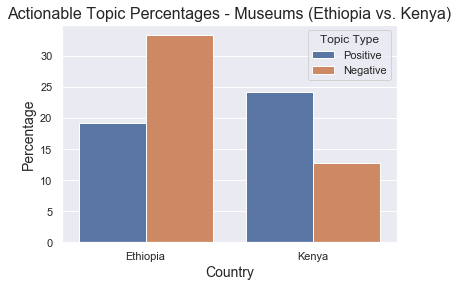

In [41]:
# Museums

df = pd.DataFrame()
df['Percentage'] = pd.Series([19.22, 33.33, 24.20, 12.68])
df['Actionable'] = pd.Series(['Positive','Negative','Positive','Negative'])
df['Country'] =pd.Series(['Ethiopia', 'Ethiopia', 'Kenya', 'Kenya'])
sns.barplot(x = 'Country', y = 'Percentage', data = df, hue = 'Actionable')
plt.title('Actionable Topic Percentages - Museums (Ethiopia vs. Kenya)', fontsize = 16)
plt.xlabel('Country', fontsize = 14)
plt.ylabel('Percentage', fontsize = 14)
plt.legend(title = 'Topic Type')
plt.show()

### Scratch

In [17]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = p.get_height()
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = p.get_width()
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

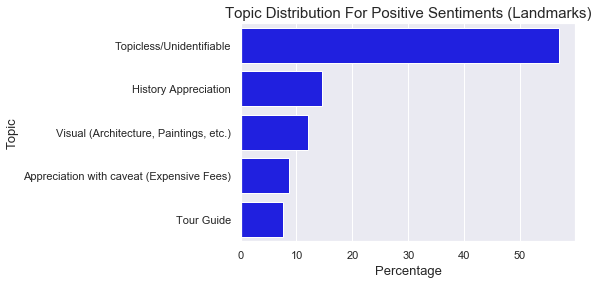

In [25]:
# 4.1.2

# plt.figure(figsize = (8, 11))
points = ['Topicless/Unidentifiable', 'History Appreciation', 'Visual (Architecture, Paintings, etc.)',
          'Appreciation with caveat (Expensive Fees)', 'Tour Guide']
perc = [57.07, 14.59, 12.07, 8.715, 7.56]

sns412 = sns.barplot(x = perc, y = points, color = 'blue')
plt.title('Topic Distribution For Positive Sentiments (Landmarks)', fontsize = 15)
plt.xlabel('Percentage', fontsize = 13)
plt.ylabel('Topic', fontsize = 13)
plt.show()

# show_values_on_bars(sns412, 'h', 0.3)

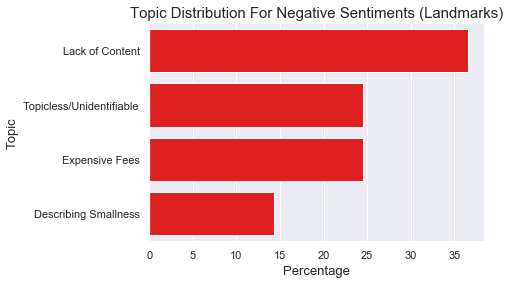

In [3]:
# 4.2.2

points = ['Lack of Content', 'Topicless/Unidentifiable', 'Expensive Fees', 'Describing Smallness']
perc = [36.57, 24.54, 24.54, 14.35]

sns.barplot(x = perc, y = points, color = 'red')
plt.title('Topic Distribution For Negative Sentiments (Landmarks)', fontsize = 15)
plt.xlabel('Percentage', fontsize = 13)
plt.ylabel('Topic', fontsize = 13)
plt.show()

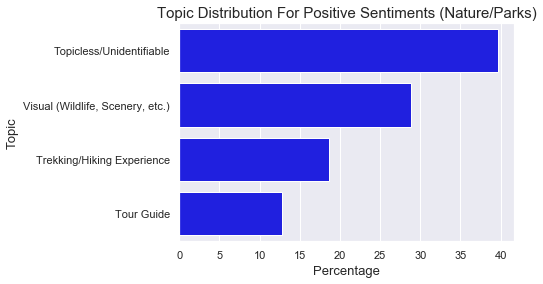

In [4]:
# 4.3.2

points = ['Topicless/Unidentifiable', 'Visual (Wildlife, Scenery, etc.)', 'Trekking/Hiking Experience', 'Tour Guide']
perc = [39.71, 28.90, 18.61, 12.78]

sns.barplot(x = perc, y = points, color = 'blue')
plt.title('Topic Distribution For Positive Sentiments (Nature/Parks)', fontsize = 15)
plt.xlabel('Percentage', fontsize = 13)
plt.ylabel('Topic', fontsize = 13)
plt.show()

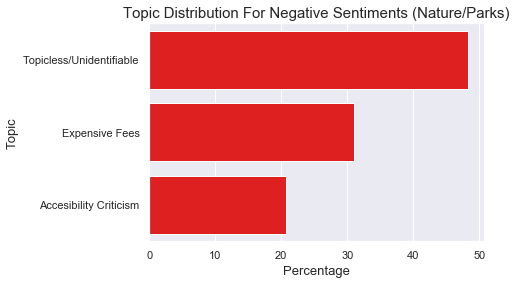

In [5]:
# 4.4.2

points = ['Topicless/Unidentifiable', 'Expensive Fees', 'Accesibility Criticism']
perc = [48.28, 31.03, 20.69]

sns.barplot(x = perc, y = points, color = 'red')
plt.title('Topic Distribution For Negative Sentiments (Nature/Parks)', fontsize = 15)
plt.xlabel('Percentage', fontsize = 13)
plt.ylabel('Topic', fontsize = 13)
plt.show()

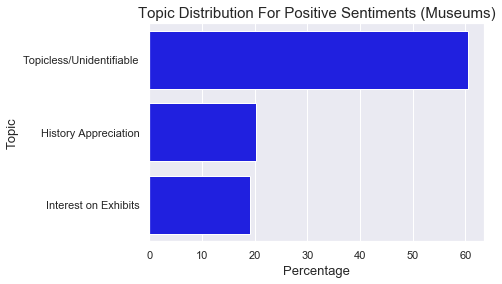

In [6]:
# 4.5.2

points = ['Topicless/Unidentifiable', 'History Appreciation', 'Interest on Exhibits']
perc = [60.49, 20.29, 19.22]

sns.barplot(x = perc, y = points, color = 'blue')
plt.title('Topic Distribution For Positive Sentiments (Museums)', fontsize = 15)
plt.xlabel('Percentage', fontsize = 13)
plt.ylabel('Topic', fontsize = 13)
plt.show()

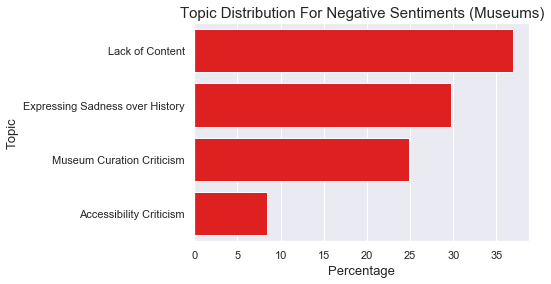

In [7]:
# 4.6.2

points = ['Lack of Content', 'Expressing Sadness over History', 'Museum Curation Criticism', 'Accessibility Criticism']
perc = [36.95, 29.72, 24.90, 8.43]

sns.barplot(x = perc, y = points, color = 'red')
plt.title('Topic Distribution For Negative Sentiments (Museums)', fontsize = 15)
plt.xlabel('Percentage', fontsize = 13)
plt.ylabel('Topic', fontsize = 13)
plt.show()